In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Model setting-up
<ol>
    <li>Disk has intial Toomre-Q = 1.5, and truncates at R = 6.</li>
    <li>Halo is rigid, with HERN index = 20, truncates at R = 500.</li>
    <li>Pattern speed (from <b>modefit</b>) &Omega;<sub>bar</sub> = 0.542, &Omega;<sub>spiral</sub> = 0.228</li>
    <li>The corresponding co-rotation radius (estimated from <b>spct</b>) R<sub>bar</sub> ~ 3.2, and R<sub>spiral</sub> ~ 7.0</li>
</ol>

In [3]:
# later time step
nn = 160
# step interval
dn = 10

filename1=('./ptcls_info_t%3.3d.dat')%(nn)
x1,y1,vx1,vy1,vz1,m1,pe1=np.loadtxt(filename1,usecols=[0,1,2,3,4,5,6],unpack=True)
filename2=('./ptcls_info_t%3.3d.dat')%(nn-dn)
x2,y2,vx2,vy2,vz2,m2,pe2=np.loadtxt(filename2,usecols=[0,1,2,3,4,5,6],unpack=True)

omega_bar = 0.581

R_max = 8.

#r1, r2, ang1, ang2, Ej1, Ej2
if(len(x1) == len(x2)):
    r1 = [np.sqrt(x1[i]**2 + y1[i]**2) for i in range(len(x1))]
    r2 = [np.sqrt(x2[i]**2 + y2[i]**2) for i in range(len(x2))]
    ang1 = [m1[i]*(x1[i]*vy1[i]-y1[i]*vx1[i]) for i in range(len(x1))]
    ang2 = [m2[i]*(x2[i]*vy2[i]-y2[i]*vx2[i]) for i in range(len(x2))]
    te1 = [m1[i]*(0.5 * (vx1[i]**2 + vy1[i]**2 + vz1[i]**2) + pe1[i]) for i in range(len(x1))]
    te2 = [m2[i]*(0.5 * (vx2[i]**2 + vy2[i]**2 + vz2[i]**2) + pe2[i]) for i in range(len(x2))]
    dr = [r1[i] - r2[i] for i in range(len(x1))]
    da = [ang1[i] - ang2[i] for i in range(len(x1))]
    Ej1 = [m1[i]*(pe1[i]+0.5*(vx1[i]**2+vy1[i]**2+vz1[i]**2)+omega_bar*(vx1[i]*y1[i]-vy1[i]*x1[i])-0.5*omega_bar**2*r1[i]**2) for i in range(len(x1))]
    Ej2 = [m2[i]*(pe2[i]+0.5*(vx2[i]**2+vy2[i]**2+vz2[i]**2)+omega_bar*(vx2[i]*y2[i]-vy2[i]*x2[i])-0.5*omega_bar**2*r2[i]**2) for i in range(len(x2))]
    dEj = [Ej1[i] - Ej2[i] for i in range(len(x1))]
else:
    print('error: NOT equal size!')

1.Angular momentum vs. R
----
The radial distribution of L<sub>Z</sub> at T = 150.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


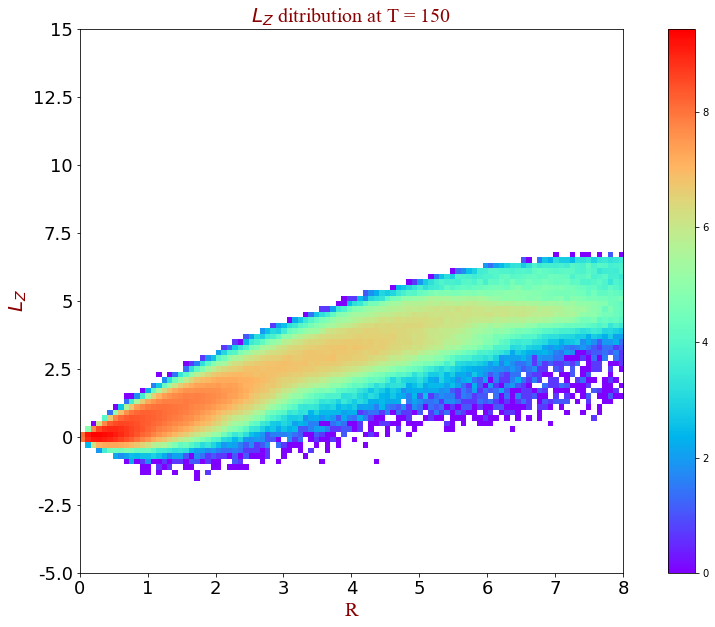

In [4]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)

H,xedges,yedges = np.histogram2d(ang2,r2,bins=(100,100),range=([-5,15],[0,R_max]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

# show X axis
plt.axhline(y = 0., linewidth = 1, linestyle = '-', color = 'k')

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,9))
ax.set_xticklabels( ('0','1','2','3','4','5','6','7','8'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,9))
ax.set_yticklabels( ('-5.0', '-2.5', '0', '2.5', '5', '7.5', '10',  '12.5',  '15'))

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('$L_{Z}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)

#title
titleStr='$L_{Z}$ ditribution at T = '+str(nn-dn)
plt.title(titleStr,fontdict=font)

#savefig
figname1='./output/Lz_R_t'+str(nn-dn)+'_color.png'
plt.savefig(figname1)

2.Total Energy vs. R
----
The radial distribution of energy ( potential + kinetic ) at T = 150.

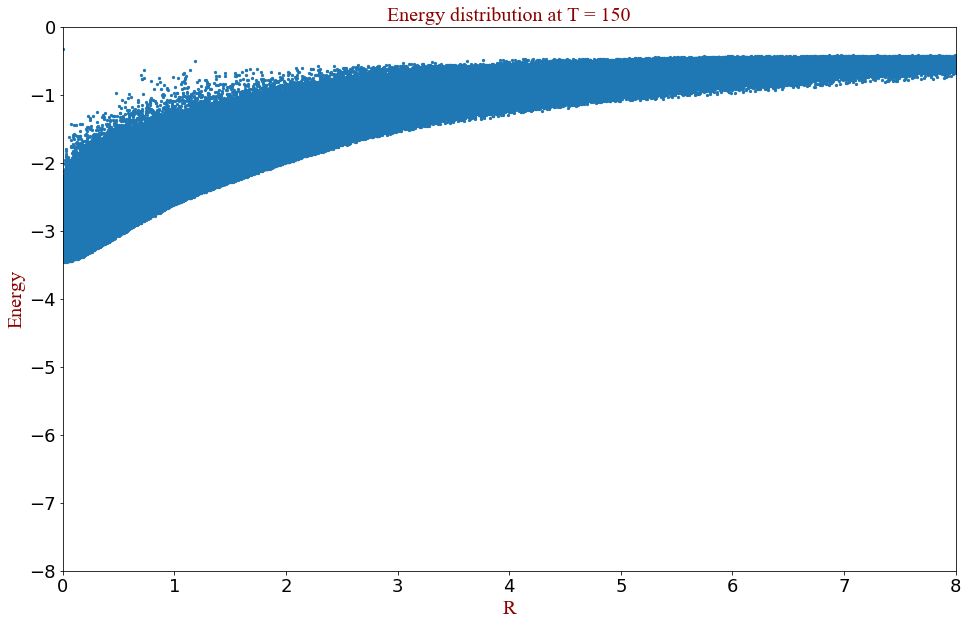

In [5]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(r2, te2, s=5)

ax = plt.gca()
ax.set_xlim(0,R_max)
ax.set_ylim(-8,0)

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('Energy',fontdict=font)

#title
titleStr='Energy distribution at T = '+str(nn-dn)
plt.title(titleStr,fontdict=font)

#savefig
figname2='./output/Te_R_t'+str(nn-dn)+'.png'
plt.savefig(figname2)

3.Ej vs. R
----
The radial distribution of <b>Jacobi energy E<sub>J</sub> </b> ( E<sub>J</sub> = E - &Omega;<sub>P</sub> &#10005; L<sub>Z</sub> ) at T = 150.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


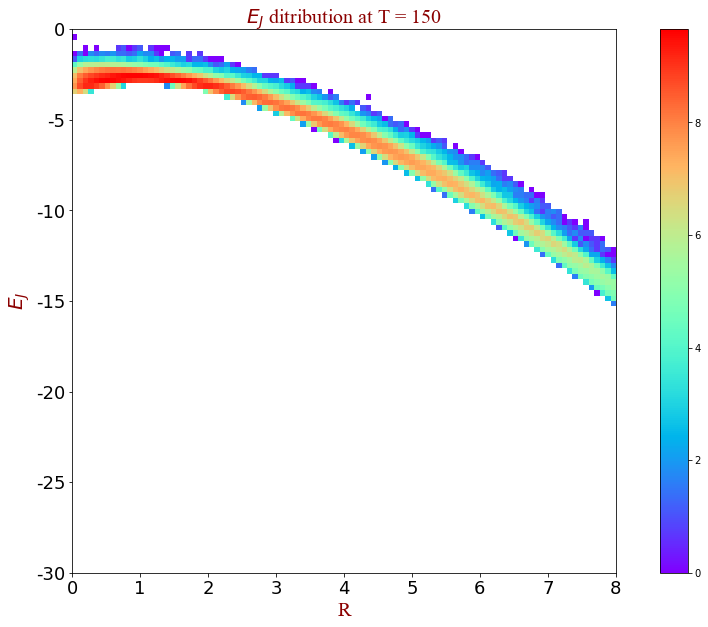

In [6]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(Ej2,r2,bins=(100,100),range=([-30,0],[0,R_max]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,9))
ax.set_xticklabels( ('0','1','2','3','4','5','6','7','8'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,7))
ax.set_yticklabels( ('-30', '-25', '-20', '-15', '-10', '-5',  '0'))

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('$E_{J}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)

#title
titleStr='$E_{J}$ ditribution at T = '+str(nn-dn)
plt.title(titleStr,fontdict=font)

#savefig
figname4='./output/Ej_R_t'+str(nn-dn)+'_color.png'
plt.savefig(figname4)

4.change of the Jacobi Energy
----
The change of <b>Jacobi energy E<sub>J</sub> </b> in &Delta;t =10 ( <b>T = 150 ~ 160</b> )

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


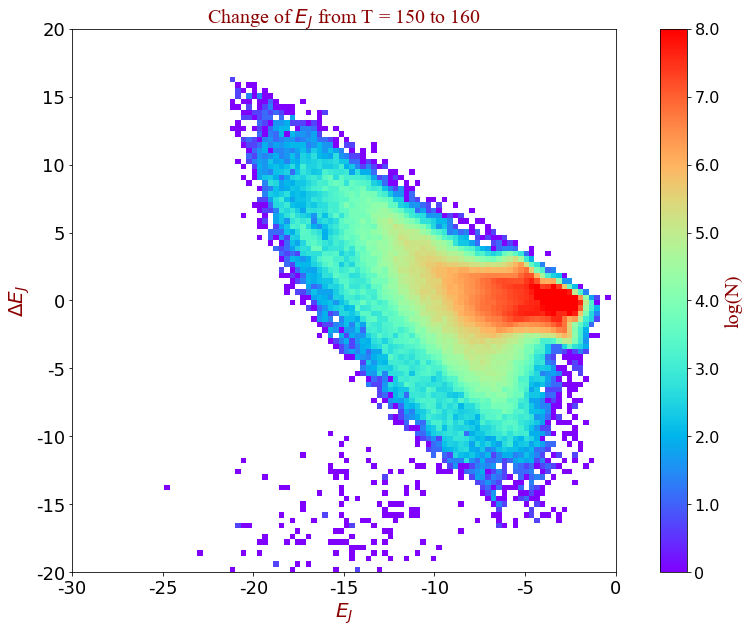

In [7]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(dEj,Ej2,bins=(100,100),range=([-20, 20],[-30,0]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,7))
ax.set_xticklabels( ('-30', '-25', '-20', '-15', '-10', '-5',  '0'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,9))
ax.set_yticklabels( ('-20', '-15', '-10', '-5', '0',  '5',  '10',  '15', '20'))

#set labels
ax.set_xlabel('$E_{J}$',fontdict=font)
ax.set_ylabel('$\Delta E_{J}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,8,9))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,8)

#title
titleStr='Change of $E_{J}$ from T = '+str(nn-dn)+' to '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname6b='./output/dEj_t'+str(nn-dn)+'_to_'+str(nn)+'_color.png'
plt.savefig(figname6b)

5.change of angular momentum
----
The change of <b>Angular Momentum L<sub>z</sub></b> in &Delta;t =10 ( <b>T = 150 ~ 160</b> )

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


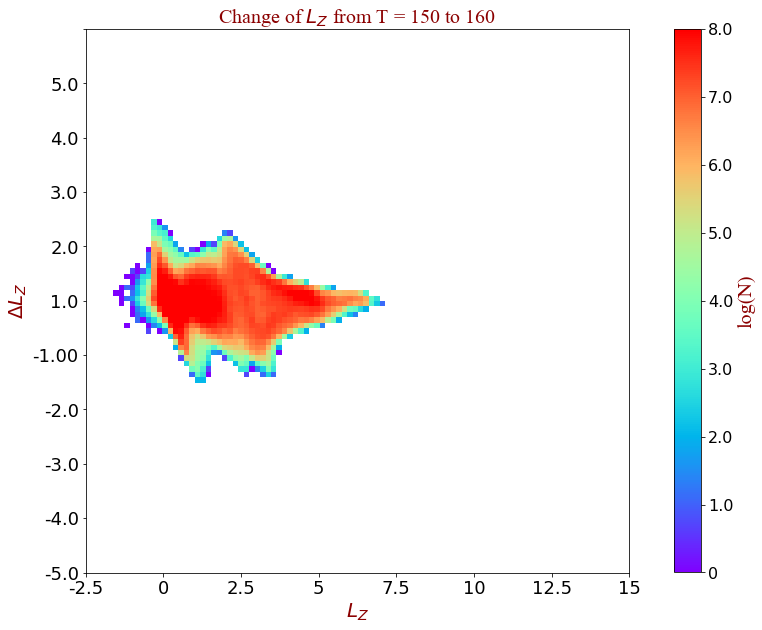

In [8]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(da,ang2,bins=(100,100),range=([-5.,5.],[-2.5,15]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,8))
ax.set_xticklabels( ('-2.5', '0', '2.5', '5', '7.5', '10',  '12.5',  '15'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,11))
ax.set_yticklabels( ('-5.0', '-4.0', '-3.0', '-2.0', '-1.0' '0', '1.0', '2.0', '3.0', '4.0', '5.0'))

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,8,9))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,8)

#title
titleStr='Change of $L_{Z}$ from T = '+str(nn-dn)+' to '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname8b='./output/da_t'+str(nn-dn)+'_to_'+str(nn)+'_color.png'
plt.savefig(figname8b)